Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

###### verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Substituição de valores nulos da coluna 'fuel_type' por Eletric
- Mantém colunas adicionais (Potencia, Capacidade_Motor, Numero_Cilindros, Numero_Valvulas)
- Transformação da variável Transmission em numérica
- Normalização dos dados numéricos

In [ ]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.head()

### NULL's substitution

#### ENGINE clone

In [ ]:
m = data1['Numero_Valvulas'].mean()
m2 = data1['Numero_Cilindros'].mean()
m3 = data1['Potencia'].mean()
m4 = data1['Capacidade_Motor'].mean()

data1['Numero_Valvulas'].fillna(m, inplace=True)
data1['Numero_Cilindros'].fillna(m2, inplace=True)
data1['Potencia'].fillna(m3, inplace=True)
data1['Capacidade_Motor'].fillna(m4, inplace=True)

#### fuel_type + engine + ext_col + int_col + accident + transmission (subsituir na's pela moda)

In [ ]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

#### clean title

In [ ]:
data1['clean_title'] = data1['clean_title'].fillna('No')

#### TRANSMISSION SEP 

In [ ]:
# import numpy as np
data1['T2'] = data1['transmission'].str.extract(r'(\d+)')
data1['T2'] = pd.to_numeric(data1['T2'], errors='coerce')
m5 = data1['T2'].mean() # ja nao precisa
data1['T2'].fillna(round(m5), inplace=True) # arredondar para cima # ja nao precisa
data1.head()
data1['T2'].isnull().sum()
data1 = data1.drop(['transmission'], axis=1) 
# # 1478 nulls


In [ ]:
len(data1['T2'].unique()) # 9
# len(data['fuel_type'].unique()) # 7
# len(data['Numero_Cilindros'].unique()) # 8
# len(data['Potencia'].unique()) # 324
# len(data['Numero_Valvulas'].unique()) # 9
# len(data['Capacidade_Motor'].unique()) # 61

### NORMALIZAÇÃO

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
data1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(data1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

### LOG

In [ ]:
import numpy as np

# Apply logarithmic transformation to skewed features
skewed_features = ['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']  # Specify the skewed features here
data1[skewed_features] = np.log1p(data1[skewed_features])
data1.head(1)

### Identificação dos Outliers - LOF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data1.select_dtypes(include=[np.number])

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data1['outlier'] = y_pred

In [ ]:
out = data1[data1['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data1[data1['outlier'] == -1].index
o=(data1.loc[outlier_indices]).head()
# o.describe() # dados outliers

In [ ]:
(p.drop(outlier_indices)).describe() # dados sem os outliers

### REMOÇÃO DOS OUTLIERS

In [ ]:
criteria = data1['outlier'] == -1
clean_data = data1[~criteria] # datarfame sem outliers
clean_data.columns
ck = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
ck.head()

### BOXPLOT OUTLIERS

In [ ]:
woo = data1.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
import numpy as np
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
colunas_numericas = woo.select_dtypes(include=np.number)

num_linhas = 2
num_colunas = 4
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 10))

for i, coluna in enumerate(colunas_numericas.columns):
    linha = i // num_colunas
    coluna_atual = i % num_colunas
    axs[linha, coluna_atual].boxplot(colunas_numericas[coluna])
    axs[linha, coluna_atual].set_title(f'{coluna}')
    axs[linha, coluna_atual].set_xlabel('Coluna')
    axs[linha, coluna_atual].set_ylabel('Valores')
    axs[linha, coluna_atual].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
ck.to_csv('ck.csv', index=False)

# subset 2

-  substituir '-' por desconhecido
- Substituição de valores nulos da coluna 'fuel_type' por Eletric
- Mantém colunas adicionais (Potencia, Capacidade_Motor, Numero_Cilindros, Numero_Valvulas)
- Remoção de Outliers por LOF
- Criação de uma variavel Classificação para os preços

In [ ]:
data2=p

### NULL's substitution

### Fuel Type

In [ ]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### ENGINE clone

In [ ]:
m = data2['Numero_Valvulas'].median()
m2 = data2['Numero_Cilindros'].median()
m3 = data2['Potencia'].median()
m4 = data2['Capacidade_Motor'].median()

data2['Numero_Valvulas'].fillna(m, inplace=True)
data2['Numero_Cilindros'].fillna(m2, inplace=True)
data2['Potencia'].fillna(m3, inplace=True)
data2['Capacidade_Motor'].fillna(m4, inplace=True)

#### accident + engine + transmission + ex_col + int_col

In [ ]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Clean Title

In [ ]:
data2['clean_title'] = data2['clean_title'].fillna('No')

In [ ]:
data2.isnull().sum()

### Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
data2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'milage']] = scaler.fit_transform(data2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas' ,'milage']])


### Remoção de Ouliers - LOF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data2.select_dtypes(include=[np.number])
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data2['outlier'] = y_pred
out = data2[data2['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data2[data2['outlier'] == -1].index
o=(data2.loc[outlier_indices]).head()
o.describe() # dados outliers
criteria = data2['outlier'] == -1
clean_data = data2[~criteria] # dataframe sem outliers
clean_data.columns
ck2 = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
ck2.head()


### Nova Categoria para os preços

In [ ]:
min_value = ck2['price'].min() #0.0
max_value = ck2['price'].max() # 0.25336347250399127

import numpy as np
bins = np.linspace(min_value,max_value,6) # econômico, médio-baixo, médio, médio-alto, alto 
bins

In [ ]:
labels = ['econômico','médio-baixo','médio','médio-alto','alto']

In [ ]:
ck2['Classificação_Preco'] = pd.cut(ck2['price'], bins=bins, labels=labels, include_lowest=True)
ck2.head(5)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(ck2['Classificação_Preco'], bins=20)

In [ ]:
ck2['Classificação_Preco'].value_counts()

# subset 3

- atribuir categorias às marcas/modelos de carros a partir do subset 1
- adiconar categoria preços

In [30]:
import pandas as pd
from sklearn.cluster import KMeans

subset3=pd.read_csv('subset1.csv')
subset3.columns

X = subset3[['Potencia','Capacidade_Motor','Numero_Cilindros', 'Numero_Valvulas', 'T2']]

# Definir o número de clusters (categorias desejadas)
n_clusters = 5 

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
subset3['Categoria'] = kmeans.labels_

subset3[subset3['Categoria']==4]

# adicção da categoria preço (igual ao subset 2)
min_value = subset3['price'].min() #0.0
max_value = subset3['price'].max() # 0.25336347250399127

import numpy as np
bins = np.linspace(min_value,max_value,6) # econômico, médio-baixo, médio, médio-alto, alto 
labels = ['econômico','médio-baixo','médio','médio-alto','alto']
subset3['Classificação_Preco'] = pd.cut(subset3['price'], bins=bins, labels=labels, include_lowest=True)
subset3.head(5)

,brand,model,model_year,milage,fuel_type,engine,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2,Categoria,Classificação_Preco
0,Jeep,Wrangler Sport,2014,71000,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Gray,Black,None reported,Yes,22000,285.0,3.6,6.0,21.716456,5.0,4,econômico
1,Toyota,Highlander XLE,2015,68575,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Silver,Gray,At least 1 accident or damage reported,Yes,26000,270.0,3.5,6.0,21.716456,7.0,4,econômico
2,Toyota,Camry Hybrid XLE,2018,69641,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,White,Black,At least 1 accident or damage reported,Yes,23995,208.0,2.5,4.0,21.716456,7.0,2,econômico
3,Subaru,Outback Touring XT,2021,33500,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,Blue,Brown,None reported,Yes,34000,260.0,2.4,4.0,21.716456,7.0,4,econômico
4,Lexus,GX 460 Base,2018,75000,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,White,Beige,At least 1 accident or damage reported,Yes,38095,301.0,4.6,8.0,21.716456,6.0,0,econômico


In [28]:
subset3.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'Potencia',
       'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2',
       'Categoria', 'Classificação_Preco'],
      dtype='object')

#### NORMALIZAR

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
subset3[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'milage', 'T2']] = scaler.fit_transform(subset3[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas' ,'milage', 'T2']])


# Regressão Linear 1

(características do carro (só com variáveis numéricas)) do subset 1


### Separar Data / Treinar e Avaliar Algoritmos

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
# import shap

In [ ]:
# selecionar as colunas necessárias a partir do df SEM OUTLIERS
ck1=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]

X = ck1.drop(['price'], axis=1) 
y = ck1['price'] 

In [ ]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
# X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


#### RANDOM FOREST

In [ ]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

In [ ]:
# Regression metrics for Random Forest
from slickml.metrics import RegressionMetrics

reg_metrics = RegressionMetrics(y_test, pred)
reg_metrics.plot()

# CORRELATION

In [ ]:
import seaborn as sns

dados_numericos = data.select_dtypes(include=['number'])
correlation_matrix = dados_numericos.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# preço está bastante correlacionado com potência e ano de fábrico

correlação p/ preço/nº valvulas diminui muito quando se substitui NaN (0.51 para 0.11)

# Regressão Linear 2

In [ ]:
# selecionar as colunas necessárias a partir do df SEM OUTLIERS
ck3=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'fuel_type', 'accident', 'clean_title']]
X = ck3.drop(['price'], axis=1) 
y = ck3['price'] 

In [ ]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

erro um pouco menor do que R1

#### CORES

In [ ]:
def simplify_color(color):
    return color.split()[0]

# Aplicar a função à coluna 'Cor'
p['simp_int_col'] = p['int_col'].apply(simplify_color)
p['simp_ext_col'] = p['ext_col'].apply(simplify_color) # de 265 p/ 191
# n vale a pena

# AD -> Subset 2

### Dividir o dataset em treino e teste

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )   # downloaded from https://github.com/slickml/slick-ml
from matplotlib import pyplot as plt
#import shap

In [ ]:
X = ck2.drop(['price'], axis=1)  # sem os outliers 
y = ck2['price'] 

### Converter categorico -> Numerico

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Crie uma instância do codificador com handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Ajuste e transforme todas as variáveis categóricas no conjunto de dados completo
X_encoded = encoder.fit_transform(X)

In [ ]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr_encoded, X_ts_encoded, y_tr, y_ts = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr_encoded, y_tr)
pred3 = DT.predict(X_ts_encoded)

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=encoder.get_feature_names_out())
plt.show()

In [ ]:
# Regression metrics for Decision Tree
reg_metrics3 = RegressionMetrics(y_ts, pred3)
reg_metrics3.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts_encoded)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)

## AD -> Subset 1- Normalização

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X = ck.drop(['price'], axis=1)  # sem os outliers 
y = ck['price'] 


#### converter categorico -> numérico

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Crie uma instância do codificador com handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Ajuste e transforme todas as variáveis categóricas no conjunto de dados completo
X_encoded = encoder.fit_transform(X)



In [ ]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr_encoded, X_ts_encoded, y_tr, y_ts = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr_encoded, y_tr)
pred3 = DT.predict(X_ts_encoded)
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=encoder.get_feature_names_out())
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts_encoded)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)


## AD -> Subset 3 - Normalização

In [34]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X = subset3.drop(['price'], axis=1)  # sem os outliers 
y = subset3['price'] 

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Crie uma instância do codificador com handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Ajuste e transforme todas as variáveis categóricas no conjunto de dados completo
X_encoded = encoder.fit_transform(X)

In [42]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr_encoded, X_ts_encoded, y_tr, y_ts = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

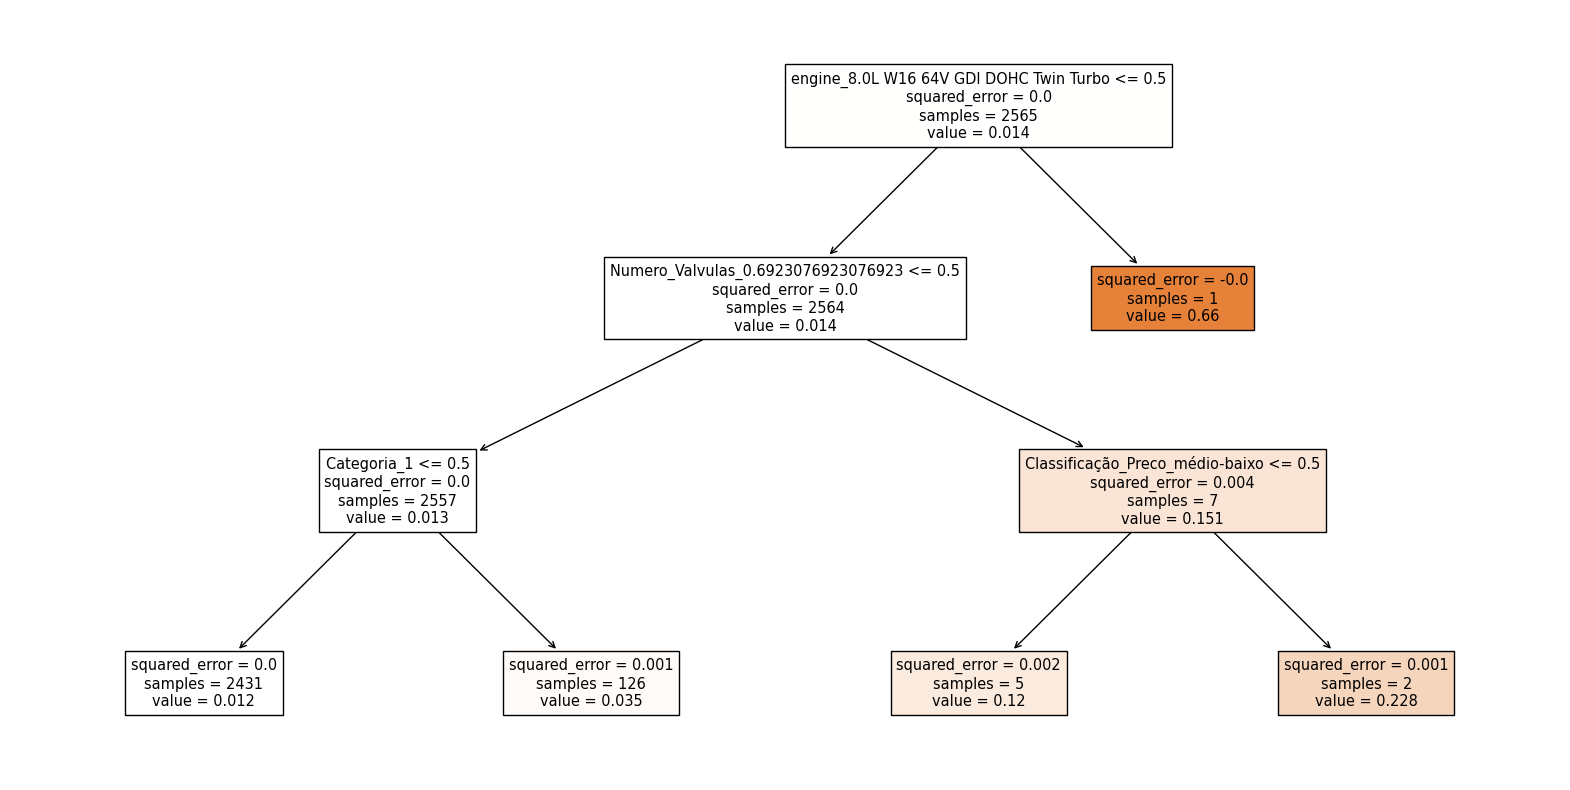

In [43]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr_encoded, y_tr)
pred3 = DT.predict(X_ts_encoded)
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=encoder.get_feature_names_out())
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts_encoded)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)


Erro Quadrático Médio (MSE): 0.0021345781843051673
Raiz do Erro Quadrático Médio (RMSE): 0.046201495476934154
Coeficiente de Determinação (R²): 0.06936915136333177
Erro Absoluto Médio (MAE): 0.010692633853530125
Mediana do Erro Absoluto (MedAE): 0.006016915087999505
